In [8]:
# %load fonts.py
#!/usr/bin/env python

# In[ ]:


# matplotlib 한글 폰트 문제 해결
import matplotlib.pyplot as plt
from matplotlib import rc
import platform 

if platform.system() == 'Darwin':   # Mac 환경 폰트 지정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)



In [3]:
import pandas as pd
import seaborn as sns


In [6]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


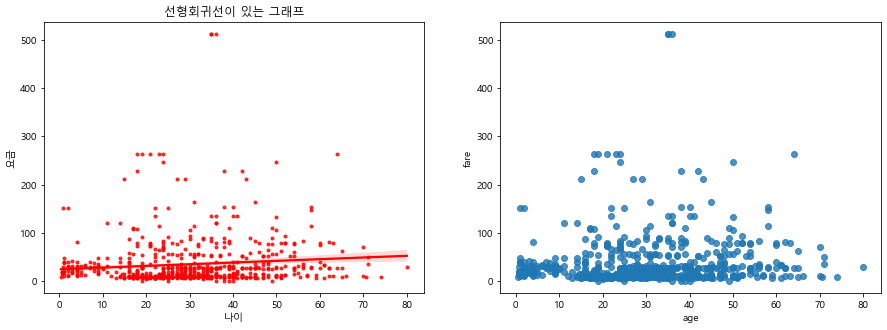

In [11]:
#seaborn을 활용하여 회귀선이 있는 산점도 그리기
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

#선형 회귀선 표시
sns.regplot(x='age',#x축 변수
           y='fare',#y축 변수
           data=titanic,#데이터
           ax=ax1,color='red',marker='.')
#선형 회귀선 표시 안함 -> fig_reg=False
sns.regplot(x='age',#x축 변수
           y='fare',#y축 변수
           data=titanic,#데이터
           ax=ax2,
           fit_reg=False)

ax1.set_title('선형회귀선이 있는 그래프')
ax1.set_xlabel('나이')
ax1.set_ylabel('요금')
plt.show()


C:\Users\HPE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


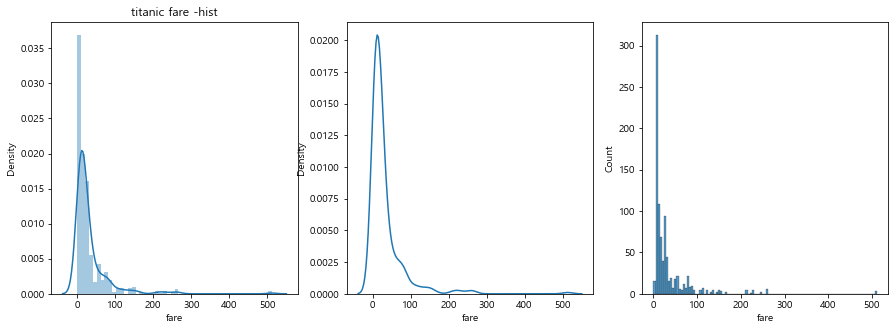

In [29]:
#히스토그램 / 커널 밀도 함수
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

#displot
sns.distplot(titanic['fare'],ax=ax1)

#kdeplot
sns.kdeplot(x='fare',data=titanic,ax=ax2)

#histplot
sns.histplot(x='fare',data=titanic,ax=ax3)

ax1.set_title('titanic fare -hist / ked')
ax1.set_title('titanic fare -ked')
ax1.set_title('titanic fare -hist')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

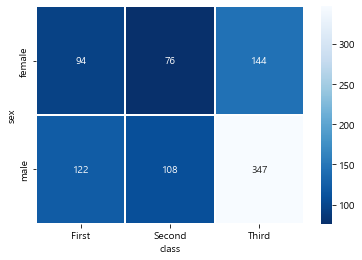

In [25]:
#히트맵
table=titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')
#heatmap 그리기
sns.heatmap(table,annot=True,fmt='d',# 그룹함수의 결과를 표시 정수로
           cmap='Blues_r',#원하는 컬러 맵
           linewidths=2,#구분선의 사이즈
           cbar=True)
plt.show

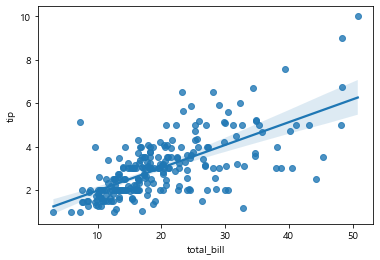

In [26]:
tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips)

In [30]:
print(sns.__version__)

0.11.2


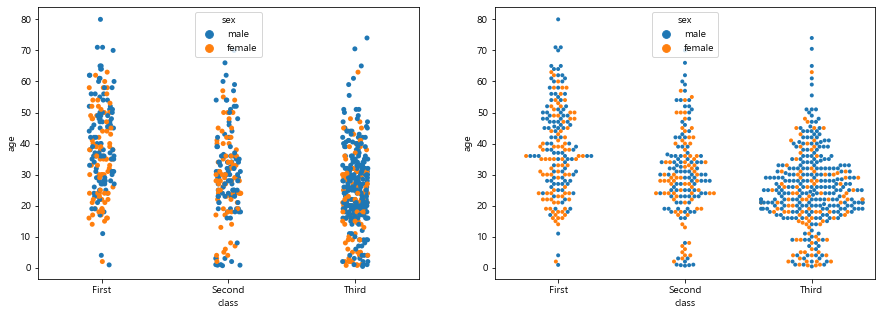

In [36]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.stripplot(x='class',y='age',data=titanic,ax=ax1,hue='sex')
sns.swarmplot(x='class',y='age',data=titanic,ax=ax2,size=4,hue='sex')
plt.show()

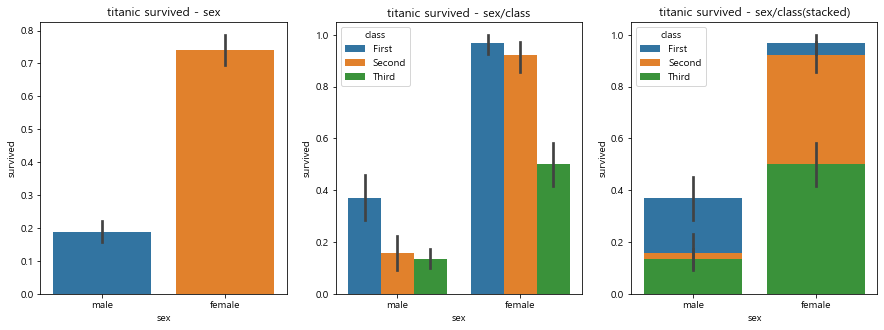

In [37]:
#막대 그래프:barplot()
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)
sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax2)
sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax3,dodge=False)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')
plt.show()

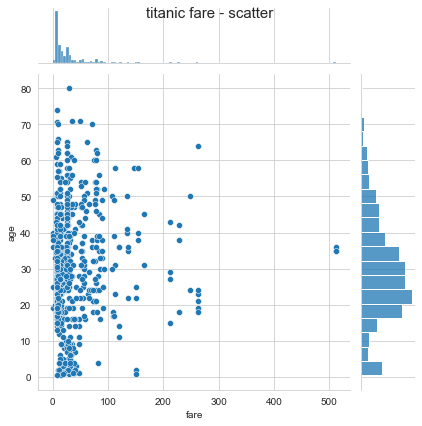

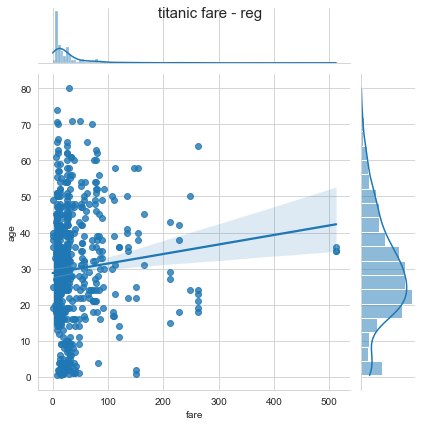

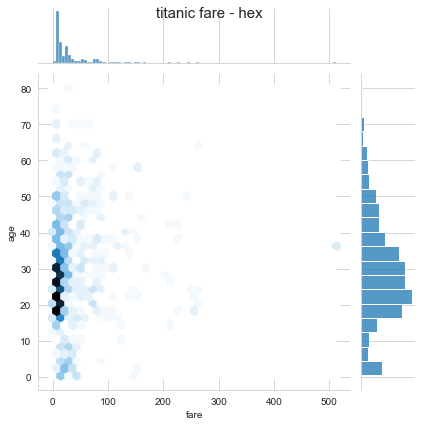

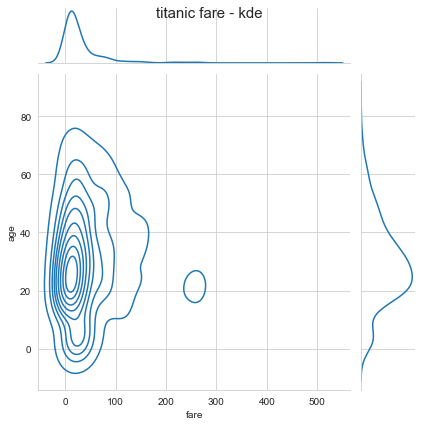

In [40]:
#조인트 그래프
sns.set_style('whitegrid')#스타일 테마 설정
j1=sns.jointplot(x='fare',y='age',data=titanic)#조인트 그래프- 산점도(기본값)
j2=sns.jointplot(x='fare',y='age',data=titanic,kind='reg')#조인트 그래프-회귀선
j3=sns.jointplot(x='fare',y='age',data=titanic,kind='hex')#조인트 그래프-육각그래프
j4=sns.jointplot(x='fare',y='age',data=titanic,kind='kde')#조인트 그래프-커널 밀집 그래프

#차트 제목 표시
j1.fig.suptitle('titanic fare - scatter',size=15)
j2.fig.suptitle('titanic fare - reg',size=15)
j3.fig.suptitle('titanic fare - hex',size=15)
j4.fig.suptitle('titanic fare - kde',size=15)

plt.show()